In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Pair Programming Preprocesado

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

Estandarizar las variables numéricas de vuestro set de datos

Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.

Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [52]:
# cargamos el dataframe

df = pd.read_pickle('datos/Invistico_Airline_v2.pkl')
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,cat_retraso_salida,cat_retraso_llegada,cat_distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,3,5,3,2,0,0.0,< 15,< 15,<1000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,2,3,2,310,305.0,120+,120+,1000-4000


In [53]:
df.reset_index(inplace=True, drop=True)

In [54]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,cat_retraso_salida,cat_retraso_llegada,cat_distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,3,5,3,2,0,0.0,< 15,< 15,<1000
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,2,3,2,310,305.0,120+,120+,1000-4000
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,3,4,4,4,2,0,0.0,< 15,< 15,1000-4000
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0,1,4,1,3,0,0.0,< 15,< 15,<1000
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0,2,4,2,5,0,0.0,< 15,< 15,<1000


In [55]:
df.index

RangeIndex(start=0, stop=129487, step=1)

## Estandarización

In [56]:
# creamos un dataframe de las variables numéricas

df_num = df.select_dtypes(include=np.number)
df_num.head(2)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0.0
1,47,2464,310,305.0


In [57]:
df_num.shape

(129487, 4)

In [58]:
df.index

RangeIndex(start=0, stop=129487, step=1)

In [59]:
# estandarizamos los datos usando el StandardScaler de la libreria de Sklearn
scaler = StandardScaler()
scaler.fit(df_num)
datos_estandarizados = scaler.transform(df_num)
df_datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = df_num.columns)

In [60]:
df_datos_estandarizados.head(10)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.691495,-1.671090,-0.386036,-0.392329
1,0.500825,0.470348,7.786328,7.536854
2,-1.615922,0.152882,-0.386036,-0.392329
3,1.360753,-1.322461,-0.386036,-0.392329
4,2.022237,-1.584420,-0.386036,-0.392329
5,-0.623697,-0.084731,-0.386036,-0.392329
6,1.757643,-1.708095,0.062126,-0.002369
7,-1.946664,-0.164585,-0.386036,-0.392329
8,1.096160,-1.858064,-0.386036,-0.392329
9,-1.152884,-0.413884,0.404838,0.283601


In [61]:
df_datos_estandarizados.shape

(129487, 4)

In [62]:
df.shape

(129487, 26)

In [63]:
df_num.shape

(129487, 4)

In [64]:
df.drop(columns=df_datos_estandarizados.columns, inplace=True)

In [65]:
df.shape

(129487, 22)

In [66]:
# lo unimos al dataframe original 

df = pd.concat([df, df_datos_estandarizados], axis = 1, join='inner')

# chequeamos que esta todo bien
df.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Checkin service,Cleanliness,Online boarding,cat_retraso_salida,cat_retraso_llegada,cat_distance,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,...,5,3,2,< 15,< 15,<1000,1.691495,-1.671090,-0.386036,-0.392329
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,...,2,3,2,120+,120+,1000-4000,0.500825,0.470348,7.786328,7.536854
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,...,4,4,2,< 15,< 15,1000-4000,-1.615922,0.152882,-0.386036,-0.392329
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,...,4,1,3,< 15,< 15,<1000,1.360753,-1.322461,-0.386036,-0.392329
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,...,4,2,5,< 15,< 15,<1000,2.022237,-1.584420,-0.386036,-0.392329


In [67]:
df.shape

(129487, 26)

In [68]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Type of Travel                       0
Class                                0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
cat_retraso_salida                   0
cat_retraso_llegada                  0
cat_distance                         0
Age                                  0
Flight Distance                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes 

## Codificación

columnas que codificar:
- Gender
- Customer Type
- Type of Travel
- Class

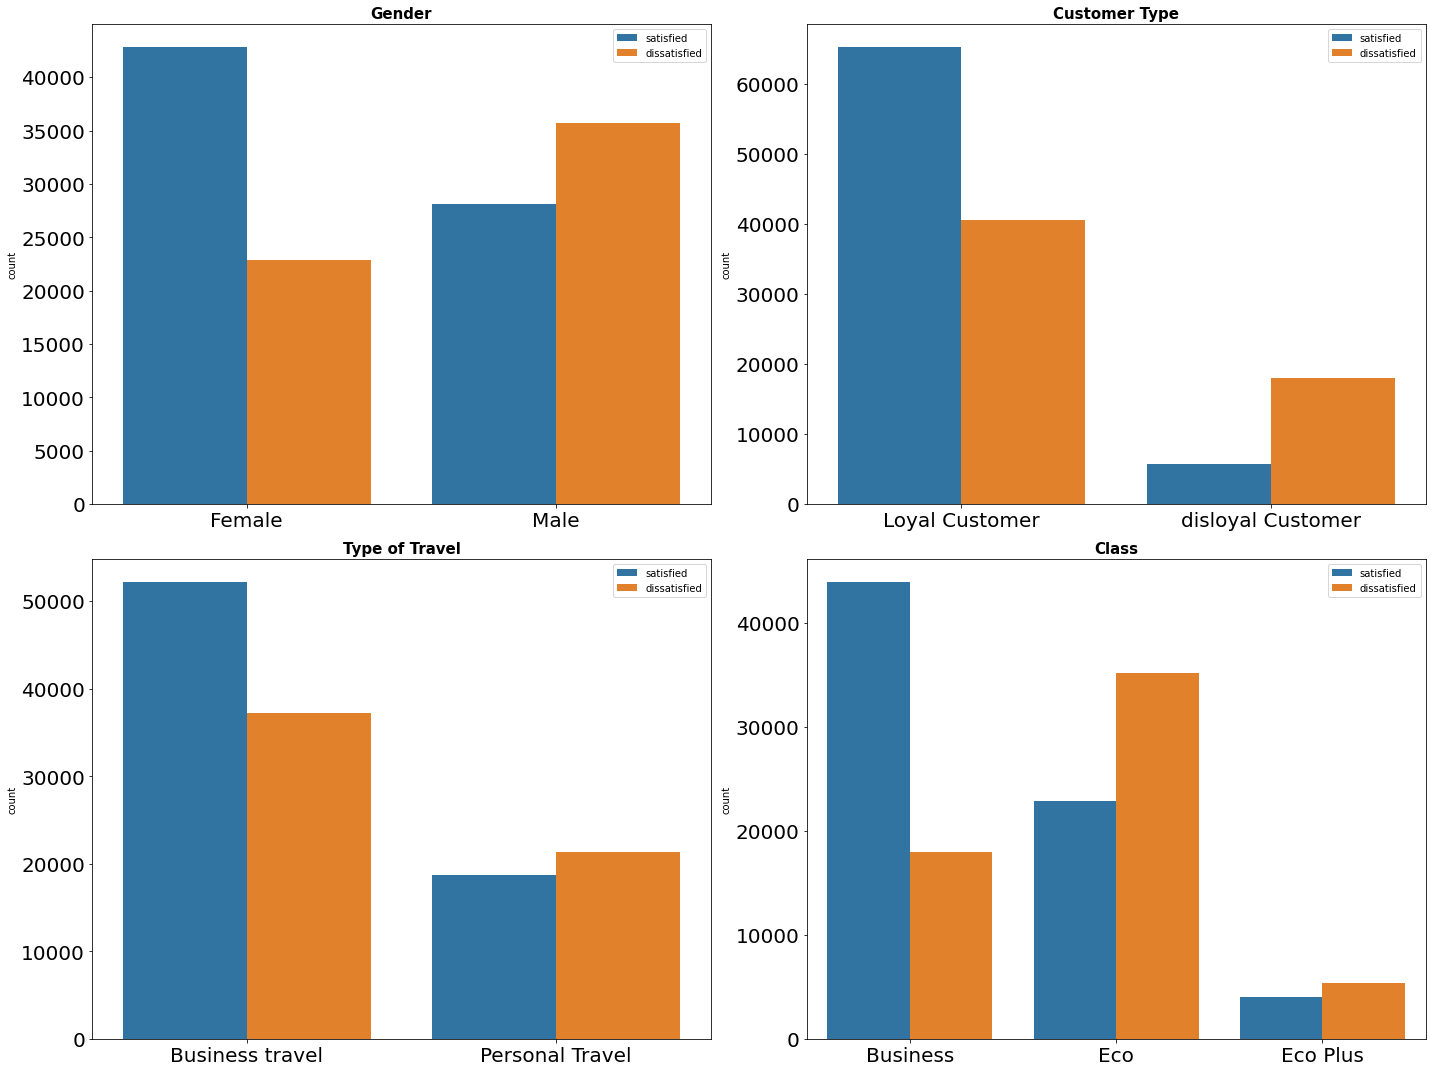

In [69]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))

axes = axes.flat

df_cod = df[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

for i, colum in enumerate(df_cod.columns): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

In [70]:
df.stb.freq(['Gender', 'satisfaction'])

,Gender,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Female,satisfied,42799,33.052739,42799,33.052739
1,Male,dissatisfied,35701,27.571108,78500,60.623846
2,Male,satisfied,28083,21.687891,106583,82.311738
3,Female,dissatisfied,22904,17.688262,129487,100.000000


In [71]:
print(f'Female satisfied: {round(42799 / (42799 + 22904) * 100)}%')
print(f'Female dissatisfied: {round(22904 / (42799 + 22904) * 100)}%')
print(f'Male satisfied: {round(28083 / (28083 + 35701) * 100)}%')
print(f'Male dissatisfied: {round(35701 / (28083 + 35701) * 100)}%')

Female satisfied: 65%
Female dissatisfied: 35%
Male satisfied: 44%
Male dissatisfied: 56%


- vemos que genero es una variable ordenal debido a las diferencias significativas entre opiniones de hombres y mujeres

Codificación:
- Male 0
- Female 1

In [72]:
df['Gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [73]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

In [74]:
df['Gender'].head()

0    1
1    0
2    1
3    1
4    1
Name: Gender, dtype: category
Categories (2, int64): [1, 0]

In [75]:
df.stb.freq(['Customer Type', 'satisfaction'])

,Customer Type,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Loyal Customer,satisfied,65194,50.347911,65194,50.347911
1,Loyal Customer,dissatisfied,40579,31.338281,105773,81.686192
2,disloyal Customer,dissatisfied,18026,13.921089,123799,95.607281
3,disloyal Customer,satisfied,5688,4.392719,129487,100.000000


In [76]:
print(f'Loyal satisfied: {round(65194 / (65194 + 40579) * 100)}%')
print(f'Loyal dissatisfied: {round(40579 / (65194 + 40579) * 100)}%')
print(f'Disloyal satisfied: {round(5688 / (18026 + 5688) * 100)}%')
print(f'Disloyal dissatisfied: {round(18026 / (18026 + 5688) * 100)}%')

Loyal satisfied: 62%
Loyal dissatisfied: 38%
Disloyal satisfied: 24%
Disloyal dissatisfied: 76%


- vemos que el tipo de cliente es una variable ordenal debido a las diferencias significativas entre opiniones de los clientes leales y los que no son leales

Codificación:
- Loyal Customer 3
- Disloyal Customer 1

In [77]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 3, 'disloyal Customer': 1})

In [78]:
df['Customer Type'].head()

0    3
1    3
2    3
3    3
4    3
Name: Customer Type, dtype: category
Categories (2, int64): [3, 1]

In [79]:
df.stb.freq(['Type of Travel', 'satisfaction'])

,Type of Travel,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Business travel,satisfied,52207,40.318333,52207,40.318333
1,Business travel,dissatisfied,37238,28.758099,89445,69.076432
2,Personal Travel,dissatisfied,21367,16.501270,110812,85.577703
3,Personal Travel,satisfied,18675,14.422297,129487,100.000000


In [80]:
print(f'Business satisfied: {round(52207 / (52207 + 37238) * 100)}%')
print(f'Business dissatisfied: {round(37238 / (52207 + 37238) * 100)}%')
print(f'Personal satisfied: {round(5688 / (18026 + 5688) * 100)}%')
print(f'Personal dissatisfied: {round(18026 / (18026 + 5688) * 100)}%')

Business satisfied: 58%
Business dissatisfied: 42%
Personal satisfied: 24%
Personal dissatisfied: 76%


- vemos que el tipo de viaje es una variable ordenal debido a las diferencias significativas entre opiniones de los clientes de negocio y el resto de clientes

Codificación:
- Business travel 2
- Personal Travel 1

In [81]:
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 1})

In [82]:
df.stb.freq(['Class', 'satisfaction'])

,Class,satisfaction,count,percent,cumulative_count,cumulative_percent
0,Business,satisfied,43977,33.962483,43977,33.962483
1,Eco,dissatisfied,35219,27.198869,79196,61.161352
2,Eco,satisfied,22898,17.683628,102094,78.844981
3,Business,dissatisfied,18013,13.911049,120107,92.756030
4,Eco Plus,dissatisfied,5373,4.149451,125480,96.905481
5,Eco Plus,satisfied,4007,3.094519,129487,100.000000


In [83]:
print(f'Business satisfied: {round(43977 / (43977 + 18013) * 100)}%')
print(f'Business dissatisfied: {round(18013 / (43977 + 18013) * 100)}%')
print(f'Eco Plus satisfied: {round(4007 / (4007 + 5373) * 100)}%')
print(f'Eco Plus dissatisfied: {round(5373 / (4007 + 5373) * 100)}%')
print(f'Eco satisfied: {round(22898 / (22898 + 35219) * 100)}%')
print(f'Eco dissatisfied: {round(35219 / (22898 + 35219) * 100)}%')

Business satisfied: 71%
Business dissatisfied: 29%
Eco Plus satisfied: 43%
Eco Plus dissatisfied: 57%
Eco satisfied: 39%
Eco dissatisfied: 61%


- vemos que la clase de viaje es una variable ordenal debido a las diferencias significativas entre las opiniones de los clientes de Business y los de Eco y Eco Plus

Codificación:
- Business 2
- Eco Plus 1
- Eco 1

In [84]:
df['Class'] = df['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 1})

In [85]:
df.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Checkin service,Cleanliness,Online boarding,cat_retraso_salida,cat_retraso_llegada,cat_distance,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,1,3,1,1,0,0,0,2,2,...,5,3,2,< 15,< 15,<1000,1.691495,-1.671090,-0.386036,-0.392329
1,satisfied,0,3,1,2,0,0,0,3,0,...,2,3,2,120+,120+,1000-4000,0.500825,0.470348,7.786328,7.536854
2,satisfied,1,3,1,1,0,0,0,3,2,...,4,4,2,< 15,< 15,1000-4000,-1.615922,0.152882,-0.386036,-0.392329
3,satisfied,1,3,1,1,0,0,0,3,3,...,4,1,3,< 15,< 15,<1000,1.360753,-1.322461,-0.386036,-0.392329
4,satisfied,1,3,1,1,0,0,0,3,4,...,4,2,5,< 15,< 15,<1000,2.022237,-1.584420,-0.386036,-0.392329


In [86]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Type of Travel                       0
Class                                0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
cat_retraso_salida                   0
cat_retraso_llegada                  0
cat_distance                         0
Age                                  0
Flight Distance                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes 

## Balanceo

In [87]:
df.stb.freq(['satisfaction'])

,satisfaction,count,percent,cumulative_count,cumulative_percent
0,satisfied,70882,54.74063,70882,54.74063
1,dissatisfied,58605,45.25937,129487,100.00000


- como nuestra variable respuesta está bastante balanceada, no hace falta hacer un downsampling o upsampling

In [89]:
# guardamos el dataframe

df.to_pickle('datos/Invistico_Airline_v3.pkl')